In [73]:
import pandas as pd

db = pd.read_csv('./campaign2.csv', sep=';')
db = db.dropna()
db.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
# drop id
db = db.drop('ID', axis=1)
# Convert Dt_Customer to datetime
db['Dt_Customer'] = pd.to_datetime(db['Dt_Customer'], format='%Y-%m-%d')

# Extract useful features from Dt_Customer
db['Customer_Year'] = db['Dt_Customer'].dt.year
db['Customer_Month'] = db['Dt_Customer'].dt.month
db['Customer_Day'] = db['Dt_Customer'].dt.day

# Drop the original Dt_Customer column
db = db.drop(['Dt_Customer'], axis=1)

# Create dummies
db = pd.get_dummies(db, columns=['Education', 'Marital_Status'])
db.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,False,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,False,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,False,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,...,False,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,...,False,True,False,False,False,True,False,False,False,False


In [75]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2216 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2216 non-null   int64  
 3   Teenhome                 2216 non-null   int64  
 4   Recency                  2216 non-null   int64  
 5   MntWines                 2216 non-null   int64  
 6   MntFruits                2216 non-null   int64  
 7   MntMeatProducts          2216 non-null   int64  
 8   MntFishProducts          2216 non-null   int64  
 9   MntSweetProducts         2216 non-null   int64  
 10  MntGoldProds             2216 non-null   int64  
 11  NumDealsPurchases        2216 non-null   int64  
 12  NumWebPurchases          2216 non-null   int64  
 13  NumCatalogPurchases      2216 non-null   int64  
 14  NumStorePurchases        2216

In [76]:
# add column total purchases
db['TotalPurchases'] = db['NumDealsPurchases'] + db['NumWebPurchases'] + db['NumCatalogPurchases'] + db['NumStorePurchases']
db['TotalPurchases'].head()

0    25
1     6
2    21
3     8
4    19
Name: TotalPurchases, dtype: int64

In [77]:
# split the data
from sklearn.model_selection import train_test_split
X = db.drop('TotalPurchases', axis=1)
y = db['TotalPurchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

Random Forest MSE: 1.4199876126126127


In [79]:
# RNN
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

X_train_rnn = X_train_rnn.astype('float32')
y_train = y_train.astype('float32')
X_test_rnn = X_test_rnn.astype('float32')
y_test = y_test.astype('float32')
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

Epoch 1/50


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3975999.5000 
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14950.9961
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1592.8500
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4203.3325
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2092.0967
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1668.0710  
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1063.0546  
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 832.1774  
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 492.3110  
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 718.2668
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 411.9754
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 356.1215  
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 301.9807  
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 271.9691  
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [80]:
# Make predictions
y_pred_rnn = rnn.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN MSE: {mse_rnn}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RNN MSE: 140.87457275390625


In [81]:
# SVR
from sklearn.svm import SVR

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}')

SVR MSE: 27.772086849557464


In [82]:
# XGBoost
import lightgbm as lgb

# Initialize and train the model
lgb_reg = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)
lgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1589
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 35
[LightGBM] [Info] Start training from score 14.918736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [83]:
print(f'Random Forest MSE: {mse_rf}')
print(f'RNN MSE: {mse_rnn}')
print(f'SVR MSE: {mse_svr}')
print(f'XGBoost MSE: {mse_lgb}')

Random Forest MSE: 1.4199876126126127
RNN MSE: 140.87457275390625
SVR MSE: 27.772086849557464
XGBoost MSE: 1.0756121319176986


In [84]:
# Now dropping the columns that make up TotalPurchases
X = db.drop(['TotalPurchases', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1)
y = db['TotalPurchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest MSE: 8.827721621621624
Random Forest R^2: 0.8443377397374963


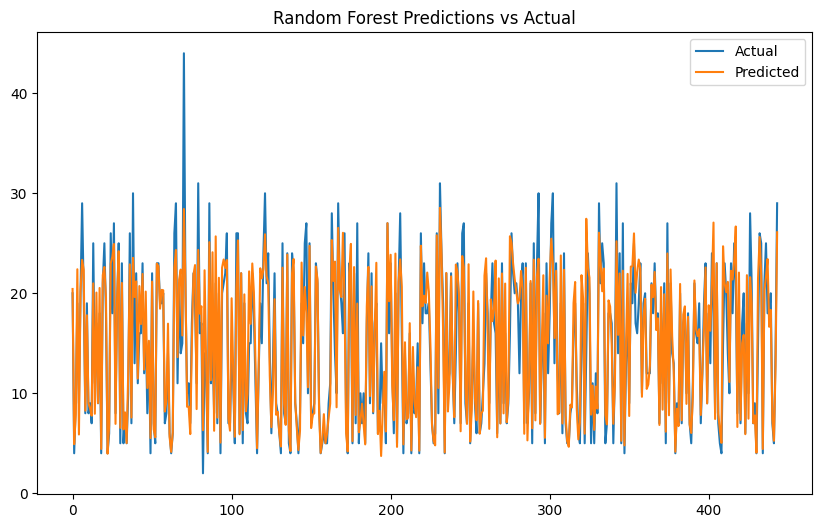

In [85]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
r2_rf = rf.score(X_test, y_test)
print(f'Random Forest R^2: {r2_rf}')

# Plot the Random Forest results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()

SVR MSE: 27.766402044259127
SVR R^2: 0.5103854554066908


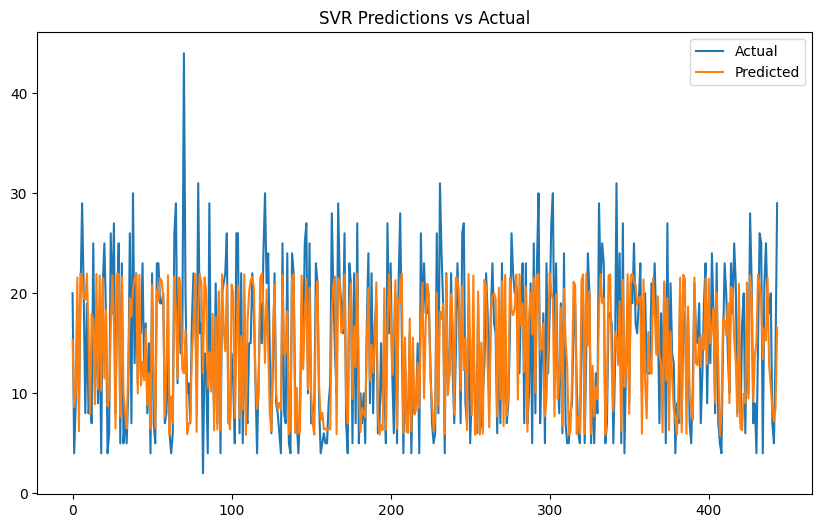

In [86]:
# SVR
from sklearn.svm import SVR

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = svr.score(X_test, y_test)
print(f'SVR MSE: {mse_svr}')
print(f'SVR R^2: {r2_svr}')

# Plot the SVR results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_svr, label='Predicted')
plt.title('SVR Predictions vs Actual')
plt.legend()
plt.show()

Epoch 1/50


/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4918008.0000   
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43180.8867
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9843.2139  
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 808.6694  
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 619.3582  
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 580.5647
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 395.3238  
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 465.4569  
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 386.1881  
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 295.4066
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 303.9264
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 264.1967
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 428.4391  
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 202.7418  
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 

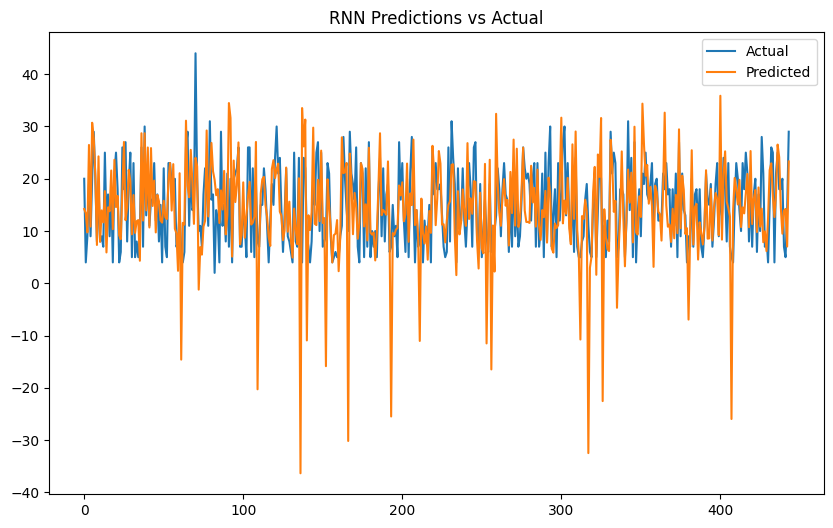

In [87]:
# RNN
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Reshape data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize and train the model
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[1])))
rnn.add(Dense(1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

X_train_rnn = X_train_rnn.astype('float32')
y_train = y_train.astype('float32')
X_test_rnn = X_test_rnn.astype('float32')
y_test = y_test.astype('float32')
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32)
# Make predictions
y_pred_rnn = rnn.predict(X_test_rnn)

# Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN MSE: {mse_rnn}')
r2_rnn = r2_score(y_test, y_pred_rnn)
print(f'RNN R^2: {r2_rnn}')

# Plot the RNN results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rnn, label='Predicted')
plt.title('RNN Predictions vs Actual')
plt.legend()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 31
[LightGBM] [Info] Start training from score 14.918736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

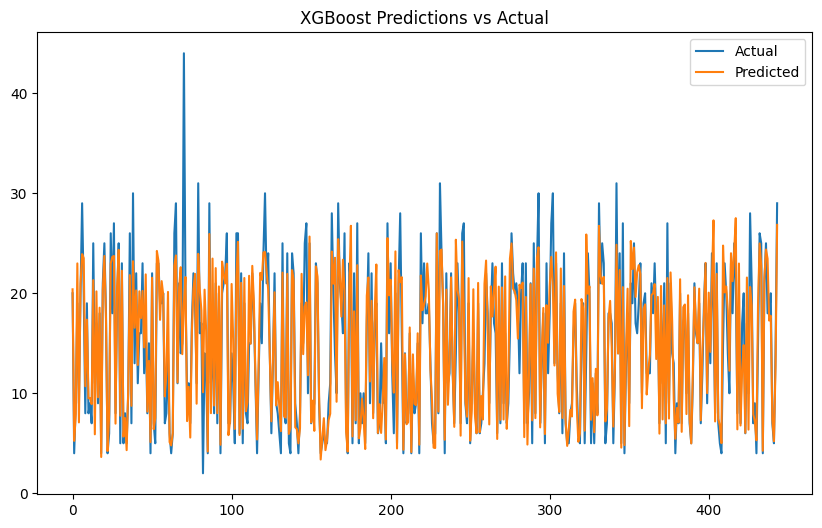

In [88]:
# XGBoost
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lgb_reg = lgb.LGBMRegressor(objective='regression', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)
lgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f'LightGBM MSE: {mse_lgb}')
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM R^2: {r2_lgb}')

# Plot the XGBoost results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lgb, label='Predicted')
plt.title('XGBoost Predictions vs Actual')
plt.legend()
plt.show()

In [89]:
print(f'Random Forest MSE: {mse_rf}')
print(f'RNN MSE: {mse_rnn}')
print(f'SVR MSE: {mse_svr}')
print(f'XGBoost MSE: {mse_lgb}')

Random Forest MSE: 8.827721621621624
RNN MSE: 66.54061126708984
SVR MSE: 27.766402044259127
XGBoost MSE: 10.494168016608869


In [90]:
print(f'Random Forest R^2: {r2_rf}')
print(f'RNN R^2: {r2_rnn}')
print(f'SVR R^2: {r2_svr}')
print(f'XGBoost R^2: {r2_lgb}')

Random Forest R^2: 0.8443377397374963
RNN R^2: -0.1733335256576538
SVR R^2: 0.5103854554066908
XGBoost R^2: 0.8149527156544233


In [ ]:
#Normalize the data vs divide by maximum and minimum